In [ ]:
#18125760056
Saunak Swayam Prakash

# HOTSTAR SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
hotstar=pd.read_csv("datasets/hotstar.allreviews_Sentiments.csv")

In [3]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [4]:
hotstar['Sentiment_Manual'].value_counts()

Neutral     1738
Positive    1733
Negative    1582
Name: Sentiment_Manual, dtype: int64

In [5]:
docs= hotstar['Reviews'].str.lower().str.replace('[^a-z ]', '')

In [6]:
stopwords= nltk.corpus.stopwords.words('english')
stemmer= nltk.stem.PorterStemmer()
docs_clean= []
for doc in docs:
    words= doc.split(' ')
    words_clean= []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean= ' '.join(words_clean)
    docs_clean.append(doc_clean)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
vectorizer.fit(docs_clean)
hot= vectorizer.transform(docs_clean)
hot

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [8]:
no_of_zeros= (5053*6145) - 37273
sparsity=(no_of_zeros)/(5053*6145) *100
sparsity

99.87996078025331

In [9]:
df_hot= pd.DataFrame(hot.toarray(), columns= vectorizer.get_feature_names())
df_hot

,aa,aaaaaand,aaaaah,aab,aabe,aacikelqcgv,aadat,aadhaar,aadhaarmem,aadhitamizhan,...,zeemoham,zeetv,zero,zinab,zindabad,ziuoubngwejxo,zmilap,znmd,zombi,zzzune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x= train_test_split(df_hot, test_size= 0.33, random_state=100)

In [11]:
train_y = hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y = hotstar.iloc[test_x.index]['Sentiment_Manual']

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model= RandomForestClassifier(random_state= 100, n_estimators= 300)
rf_model.fit(train_x, train_y)
rf_predict_class= rf_model.predict(test_x)
accuracy_score(test_y, rf_predict_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7470023980815348

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
rf_model= MultinomialNB()
rf_model.fit(train_x, train_y)
rf_predict_class= rf_model.predict(test_x)
accuracy_score(test_y, rf_predict_class)

0.7452038369304557

- Use hotstar data, predict sentiment score for the reviews column using vader package.
- Convert score to labels
    - Positive (score > 0.05)
    - Negative (score < -0.05)
    - Neutral (-0.05 <= score <= 0.05)
- Calculate the accuracy score
- Compare the accuracy with supervised models and comment whether supervised or unsupervised gives best accuracy
- Create a multiline chart for comparing no. of positive, negative and neutral reviews for each day (we have one week data)

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound >.5:
        return "Positive"
    elif compound<-.5:
        return "Negative"
    else:
        return "Neutral"

In [16]:
docs_clean_df=pd.DataFrame({"text":docs_clean,"sentiment_manual":hotstar["Sentiment_Manual"]})

In [17]:
docs_clean_df.head()

,text,sentiment_manual
0,hh,Negative
1,,Negative
2,hotstarhelp paymnt premium subscript transact ...,Negative
3,hotstartweet current jio network would like kn...,Negative
4,hotstartweet episod sarabhai vs sarabhai seaso...,Negative


In [18]:
docs_clean_df["sentiment_manual"].value_counts()

Neutral     1738
Positive    1733
Negative    1582
Name: sentiment_manual, dtype: int64

In [19]:
docs_clean_df["vader_sentiment"]=docs_clean_df["text"].apply(get_sentiment)

In [20]:
docs_clean_df.head()

,text,sentiment_manual,vader_sentiment
0,hh,Negative,Neutral
1,,Negative,Neutral
2,hotstarhelp paymnt premium subscript transact ...,Negative,Negative
3,hotstartweet current jio network would like kn...,Negative,Neutral
4,hotstartweet episod sarabhai vs sarabhai seaso...,Negative,Neutral


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(docs_clean_df["sentiment_manual"],docs_clean_df["vader_sentiment"])

0.44112408470215714

### The accuracy of supervised model is better than the accuracy of unsupervised model.

In [23]:
hotstar["Month"].nunique()

1

In [24]:
hotstar.sort_values("Date",inplace=True)

In [25]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
892,893,rubinashaikh,8/4/2017,@hotstartweets @starindia @StarWorldIndia now ...,@hotstartweets @starindia @starworldindia now ...,Negative,Negative,101,Twitter,2017,8,4,Negative
1323,1324,desinternetwasi,8/4/2017,@hotstartweets @yukibhambri @rohanbopanna Well...,@hotstartweets @yukibhambri @rohanbopanna well...,Neutral,Neutral,77,Twitter,2017,8,4,Positive
4786,4787,SAndrewJones,8/4/2017,Oh and those promoted tweets of @hotstartweets...,oh and those promoted tweets of @hotstartweets...,Positive,Positive,102,Twitter,2017,8,4,Positive
315,316,Akshayjoshi87,8/4/2017,Hey @hotstartweets are can we #GoTS7e4 tomorro...,hey @hotstartweets are can we #gots7e4 tomorro...,Help,Negative,55,Twitter,2017,8,4,Neutral
1322,1323,PranavDixit,8/4/2017,@akm1410 @hotstartweets They issued an officia...,@akm1410 @hotstartweets they issued an officia...,Neutral,Neutral,77,Twitter,2017,8,4,Positive


In [26]:
negative_count=hotstar[hotstar["Sentiment_Manual"]=="Negative"].groupby(["Date"]).count()
df_neg=pd.DataFrame({"Count":negative_count["ID"]}).reset_index()
df_neg

,Date,Count
0,4,117
1,5,150
2,6,105
3,7,148
4,8,66
5,9,162
6,10,338
7,11,314
8,12,156
9,13,26


In [27]:
positive_count=hotstar[hotstar["Sentiment_Manual"]=="Positive"].groupby(["Date"]).count()
df_pos=pd.DataFrame({"Count":positive_count["ID"]}).reset_index()
df_pos

,Date,Count
0,4,107
1,5,68
2,6,36
3,7,49
4,8,22
5,9,276
6,10,469
7,11,502
8,12,177
9,13,27


In [28]:
neutral_count=hotstar[hotstar["Sentiment_Manual"]=="Neutral"].groupby(["Date"]).count()
df_net=pd.DataFrame({"Count":neutral_count["ID"]}).reset_index()
df_net

,Date,Count
0,4,103
1,5,178
2,6,146
3,7,200
4,8,133
5,9,204
6,10,222
7,11,240
8,12,235
9,13,77


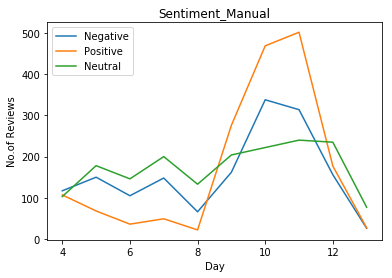

In [29]:
plt.plot(df_neg["Date"],df_neg["Count"])
plt.plot(df_pos["Date"],df_pos["Count"])
plt.plot(df_net["Date"],df_net["Count"])
plt.legend(['Negative', 'Positive', 'Neutral'], loc='upper left')
plt.title("Sentiment_Manual")
plt.xlabel("Day")
plt.ylabel("No.of Reviews")
plt.show()

In [30]:
docs_clean_df["Day"]=hotstar["Date"]

In [31]:
docs_clean_df.head()

,text,sentiment_manual,vader_sentiment,Day
0,hh,Negative,Neutral,10
1,,Negative,Neutral,11
2,hotstarhelp paymnt premium subscript transact ...,Negative,Negative,12
3,hotstartweet current jio network would like kn...,Negative,Neutral,11
4,hotstartweet episod sarabhai vs sarabhai seaso...,Negative,Neutral,5


In [32]:
docs_clean_df["vader_sentiment"].value_counts()

Neutral     3974
Positive     802
Negative     277
Name: vader_sentiment, dtype: int64

In [33]:
pos_count=docs_clean_df[docs_clean_df["vader_sentiment"]=="Positive"].groupby(["Day"]).count()
pos_df=pd.DataFrame({"Count":pos_count["text"]}).reset_index()
pos_df["Count"].sum()

802

In [34]:
net_count=docs_clean_df[docs_clean_df["vader_sentiment"]=="Neutral"].groupby(["Day"]).count()
net_df=pd.DataFrame({"Count":net_count["text"]}).reset_index()
net_df["Count"].sum()

3974

In [35]:
neg_count=docs_clean_df[docs_clean_df["vader_sentiment"]=="Negative"].groupby(["Day"]).count()
neg_df=pd.DataFrame({"Count":neg_count["text"]}).reset_index()
neg_df["Count"].sum()

277

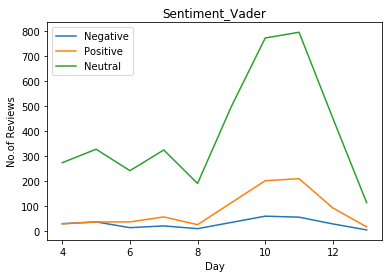

In [37]:
plt.plot(neg_df["Day"],neg_df["Count"])
plt.plot(pos_df["Day"],pos_df["Count"])
plt.plot(net_df["Day"],net_df["Count"])
plt.legend(['Negative', 'Positive', 'Neutral'], loc='upper left')
plt.title("Sentiment_Vader")
plt.xlabel("Day")
plt.ylabel("No.of Reviews")
plt.show()